# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 21, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

Run the following cell to import NumPy and Pyplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [3]:
def classical_gram_schmidt(A):
    """
    QR decomposition using classical Gram-Schmidt procedures. Loses orthogonality due to rounding error.
    Input: 
    A = m x n matrix that forms a basis (l.i. columns). m must be larger than n. Input is not changed.
    
    Returns:
    R = Upper triangular matrix
    Q = Orthogonal matrix 
    
    """
    # Get shape of matrix A
    m, n = np.shape(A)
    assert m >= n, "Matrix should have more or equal rows to columns"
    
    # Make empty QR matrixes in right form; R with 0 because we only fill in the rest of the squares
    # R is a square matrix; Q is m x n
    R = np.zeros((n, n))
    Q = np.array(A, dtype= 'float64')
    
    # Take the first column of A to be the first vector and normalize it to form an orthogonal basis
    # The top-left value for R is the norm of the first column of A

    Q[:, 0] = A[:, 0] / linalg.norm(A[:, 0])
    R[0, 0] = A[:, 0] @ Q[:, 0]
    
    # Loop over the rest of the columns
    for k in range(1, n):
        
        # Get the current column being transformed into an orthogonal vector
        a = A[:, k]
        
        # Set u as a
        u = a
    
        # Calculate u through the iterative process of multiplying previous u and a vectors
        for e_k in range(0, k-1):
        
            e_prev_k = Q[:, e_k]
          
            # Calculate the top row of R by taking the current a vector and multiplying it with previous e_ks
            R[e_k, k] = (a @ e_prev_k)
            
            # Calculate u
            u = u - ((a @ e_prev_k) * e_prev_k)
            
            # Check linear independence
            assert not np.array_equal(u, np.zeros(u.shape)), "The column vectors are not linearly independent"
        
        # Normalize the u vector by the norm of u
        Q[:, k] = u / (linalg.norm(u) ) 
        
        # Get current R for this k
        R[k, k] = a @ Q[:, k]
             
        
    return Q, R

def modified_gram_schmidt(A):
    """
    QR decomposition using modified Gram-Schmidt procedures; superior numerically to classical Gram-Schmidt.
    Input: 
    A = m x n matrix that forms a basis (l.i. columns). m must be larger than n. Input is not changed.
    
    Returns:
    R = Upper triangular matrix
    Q = Orthogonal matrix 
    
    Taken from https://github.com/kajetanj/QR-MGS-decomp/blob/master/decompose.py
    """
    m, n = np.shape(A)
    assert m >= n, "Matrix should have more or equal rows to columns"

    Q = np.array(A, dtype='float64')
    R = np.zeros((n, n))
    
    # Loop over columns
    for k in range(n):
        a_k = Q[:, k]
        R[k,k] = np.linalg.norm(a_k) 
        
        # Check linear independence
        assert R[k,k], "The column vectors are not linearly independent"
       
        # Normalize current column
        a_k /= R[k, k]
        
        for i in range(k+1, n):
            # subtract from succeeding columns their components in current column 
            a_i = Q[:, i]
            R[k,i] = a_k.T @ a_i
            a_i -= R[k, i] * a_k

    return Q, R

matrix = np.array([
            [1.0, 1.0, -3.0],
            [3.0, 2.0, 1.0],
            [-2.0, 0.5, 2.5],
            [-8, -6, 2]
        ])
calc_q, calc_r = classical_gram_schmidt(matrix)
print(f"QR decomposition of the classical method is correct: {np.allclose(matrix, calc_q @ calc_r)}")
print("However, there is a loss of orthogonality; Qt @ Q should be identity matrix:\n", np.around(calc_q.T @ calc_q, 3))

mod_q, mod_r = modified_gram_schmidt(matrix)
print(f"QR decomposition of the classical method is correct: {np.allclose(matrix, mod_q @ mod_r)}" )
print("The loss of orthogonality seems to not be an issue for the modified method:\n", np.around(mod_q.T @ mod_q, 3))

QR decomposition of the classical method is correct: True
However, there is a loss of orthogonality; Qt @ Q should be identity matrix:
 [[ 1.     0.952 -0.   ]
 [ 0.952  1.     0.114]
 [-0.     0.114  1.   ]]
QR decomposition of the classical method is correct: True
The loss of orthogonality seems to not be an issue for the modified method:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



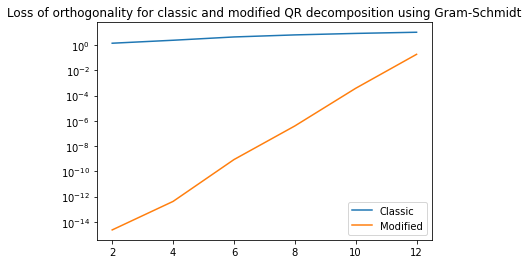

In [4]:
n_options = np.arange(2, 14, 2)
classical_losses = []
modified_losses = []

for n in n_options:
    matrix = linalg.hilbert(n)
    
    Q_classical = classical_gram_schmidt(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_classical.T @ Q_classical))
    classical_losses.append(c_loss)
    
    Q_modified = modified_gram_schmidt(matrix)[0]
    m_loss = np.linalg.norm(np.identity(n) - (Q_modified.T @ Q_modified))
    modified_losses.append(m_loss)
    
    
plt.semilogy(n_options, classical_losses, label = "Classic")
plt.semilogy(n_options, modified_losses, label = "Modified")
plt.legend()
plt.title("Loss of orthogonality for classic and modified QR decomposition using Gram-Schmidt")
plt.show()

The classical Gram-Schmidt algorithm is not ideal for numerical calculations since it is known to be unstable

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


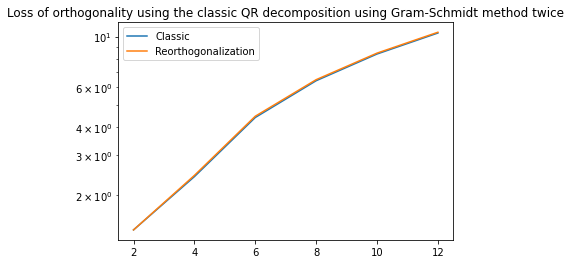

In [6]:
n_options = np.arange(2, 14, 2)
classical_losses = []
classical2_losses = []

for n in n_options:
    matrix = linalg.hilbert(n)
    
    Q_classical = classical_gram_schmidt(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_classical.T @ Q_classical))
    classical_losses.append(c_loss)
    
    Q_classical2 = classical_gram_schmidt(Q_classical)[0]
    c_loss2 = np.linalg.norm(np.identity(n) - (Q_classical2.T @ Q_classical2))
    classical2_losses.append(c_loss2)
    
    
plt.semilogy(n_options, classical_losses, label = "Classic")
plt.semilogy(n_options, classical2_losses, label = "Reorthogonalization")
plt.legend()
plt.title("Loss of orthogonality using the classic QR decomposition using Gram-Schmidt method twice")
plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [7]:
def get_norm(x):
    """"
    Input: 
    a vector of size n
    
    Returns:
    the norm of the vector
    """
    return np.sqrt(np.sum(np.square(x)))


def sign(x):
    """
    Input:
    a floating point number
    
    Returns:
    -1 if the input is negative, 1 if the input is positive
    """
    if x<0:
        return -1
    else: 
        return 1
    
def householder(A):
    """
    QR decomposition using the Householder method
    Input: 
    A = m x n matrix that forms a basis (l.i. columns). m must be larger than n
    
    Returns:
    R = Upper triangular matrix
    Q = Orthogonal matrix
    """
    
    # Get number of rows and columns of A
    m, n = (A.shape)
    # Make an identity matrix with same shape as A
    I = np.identity(m)
    # Initialize array in which Householder transformations will be stored
    H = []
    
    # Loop over columns
    for k in range(0, min(n, m-1)):
        
        # Compute Housholder vector of the current column
        alpha_k = - sign(A[k,k]) * get_norm(A[k:, k])
        e_k = I[:, k]
        v_k = np.append(np.zeros(k), A[k:m,k]) - alpha_k * e_k
        v_k = np.reshape(v_k,(len(v_k), -1))
        
        # Calculate householder transform and store it in array
        beta_k = np.dot(v_k.T, v_k)[0,0]
        H_k = I - 2/beta_k * (v_k * v_k.T)
        H.append(H_k)
        
        # Apply householder transform
        A = H_k @ A
    
    # R is HA and in the loop all householder transformations were applied to A
    R = A
    
    # Q is the product of all housholdhold transformations
    Q = H[0]
    for idx in range(1, len(H)):
        Q = Q @ H[idx]
    
    # Round the values in the matrix to three decimal places
        
    return Q, R

## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


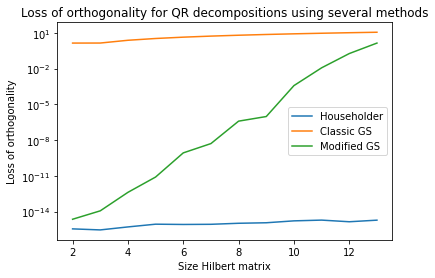

In [8]:
n_options = np.arange(2, 14, 1)
householder_losses = []
classical_losses = []
modified_losses = []

for n in n_options:
    matrix = linalg.hilbert(n)
    
    Q_householder = householder(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_householder.T @ Q_householder))
    householder_losses.append(c_loss)
    
    Q_classical = classical_gram_schmidt(matrix)[0]
    c_loss = np.linalg.norm(np.identity(n) - (Q_classical.T @ Q_classical))
    classical_losses.append(c_loss)
    
    Q_modified = modified_gram_schmidt(matrix)[0]
    m_loss = np.linalg.norm(np.identity(n) - (Q_modified.T @ Q_modified))
    modified_losses.append(m_loss)

plt.semilogy(n_options, householder_losses, label = "Householder")
plt.semilogy(n_options, classical_losses, label = "Classic GS")
plt.semilogy(n_options, modified_losses, label = "Modified GS")
plt.legend()
plt.title("Loss of orthogonality for QR decompositions using several methods")
plt.xlabel("Size Hilbert matrix")
plt.ylabel("Loss of orthogonality")
plt.show()

The classical Gram-Schmidt (CGS) process has two important shortcomings (Heath, p131). First of all, The loss of orthogonality is one of the main issues associated with CGS, as the orthogonality among $\mathbf{q}_k$ is often lost as a result of rounding errors. Secondly, it requires seperate storage for $\mathbf{Q}_1$, **R** and **A**, which not memory efficient. 

The modified Gram-Schmidt (MGS) tries to alleviate these shortcomings by rearranging some of the steps in CGS. In MGS, when a vector $\mathbf{q}_k$ is computed, each reamining vector is orthogonalized against $\mathbf{q}_k$. This also then allows for the use of column pivoting. As a result, the algorithm is able to identify in **A** a maximal linearly independent set of columns. Column pivoting is also used to deal with the small, but problematic, non-zero value of $\mathbf{r}_{kk}$. Indeed, as we can see in the graph above, when we compare the loss of orthogonalisty for QR compositions made through the classical Gram-Schmidt (CGS) process and the modified Gram-Schmidt (MGS) process, the MGS suffers from a lower loss of orthogonality for small sizes of the Hilbert matrix. However it the loss does increase with the size of the Hilbert matrix.
Indeed, these findings are confirmed in literature. Giraud, Langou & Rozloznik (2005) plotted the loss of orthogonality over iterations steps the MGS had lower loss at each iteration compared to the CGS. However, MGS still requires the seperate storage of \mathbf{Q}_$1$ and **R**, which is not optimal. 
In the Householder method we can store \mathbf{Q}_$1$ and **R** in the place of **A**, which is an improvement upon MGS, although we do not make use of that in our implementation. The Householder method also further alleviates the problem of the loss of orthogonality. We can see this clearly when looking at the figure above, as the loss of orthogonality remains consistently low for different sizes of the Hilbert Matrix (whereas the MGS increases with size). 
However, this does not mean that using the Householder method is always preferable to using Gram-Schmidt methods. Research has shown that for the least squares problem, the modified Gram-Schmidt method tends to be more accurate then the Householder method (Björck, 1994).


Giraud, L., Langou, J., & Rozloznik, M. (2005). The loss of orthogonality in the Gram-Schmidt orthogonalization process. Computers & Mathematics with Applications, 50(7), 1069-1075.
Heath, M. T. (2018). Scientific computing: an introductory survey, revised second edition. Society for Industrial and Applied Mathematics.
Björck, Å. (1994). Numerics of gram-schmidt orthogonalization. Linear Algebra and Its Applications, 197, 297-316.
